<a href="https://colab.research.google.com/github/antvilla06/PortFolio/blob/main/Tensor_Flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Redes Neuronales

In [ ]:
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds
import numpy as np
import tensorflow as tf

# Construct a tf.data.Dataset
ds = tfds.load('mnist', split='train', shuffle_files=True)

In [ ]:
#Creación de capas de redes neuronales

celcius = np.array([-40, -10, 0, 8, 15, 22,38], dtype  = float)
farenheit = np.array([-40,14,32,46,59,72,100], dtype = float)

In [ ]:
#Ceación de una capa de redes neuronales
capa = tf.keras.layers.Dense(units = 1, input_shape=[1] )
modelo = tf.keras.Sequential([capa])

In [ ]:
#Asignación de Pesos

modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss = 'mean_squared_error'
)

In [ ]:

print('Comenzando entrenamiento...')
historial = modelo.fit(celcius, farenheit, epochs=1000,  verbose = False)
print("Modelo entrenado")

Comenzando entrenamiento...
Modelo entrenado


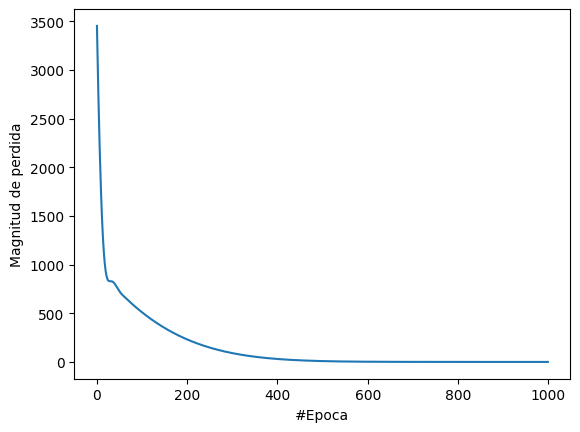

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("#Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])



In [ ]:
#Predicciones
resultado = modelo.predict([150.0])
print("El resultado es" + str(resultado) + "farenheit")

1/1 [==============================] - 0s 68ms/step
El resultado es[[301.6537]]farenheit


In [ ]:
#Sesgo y variables de modeos
#Como todas las capas por definición tiene pesos entonces
print('Variables internas de modelo')
print(capa.get_weights())

Variables internas de modelo
[array([[1.7982144]], dtype=float32), array([31.921501], dtype=float32)]


In [ ]:
#Ahora debemos agregar neuras y capas intemedias para obtener mejores resultados
# ¿Se obtendran los mismos resultados si tomamos mas datos vs tomamos mas capas y más neuronas?

#Ceación de una capa de redes neuronales
capa = tf.keras.layers.Dense(units = 3, input_shape=[1] )
capa1= tf.keras.layers.Dense(units = 3)
resultados = tf.keras.layers.Dense(units=3)
modelo = tf.keras.Sequential([capa,capa1, resultados])

#Dentificador de números

In [ ]:
datos, metadatos = tfds.load('mnist',as_supervised=True, with_info=True)
datos
metadatos

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/root/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)

In [ ]:
import numpy as np
import tensorflow as tf

# Define the sequence data
sequence = [1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2]
n = len(sequence)

# Define the input and target data
X = np.array(sequence[:-1]).reshape(-1, 1, 1)
y = np.array(sequence[1:]).reshape(-1, 1, 1)

# Define the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(10, input_shape=(1, 1), return_sequences=True),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=1000, verbose=0)

# Predict the next number in the sequence
next_number = model.predict(np.array([[sequence[-1]]]).reshape(-1, 1, 1))
print("Next number in the sequence:", next_number[0][0][0])

1/1 [==============================] - 0s 113ms/step
Next number in the sequence: 1.1974688


#Perros y gatos

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
datos,  metadatos = tfds.load('cats_vs_dogs', as_supervised = True, with_info=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.1.incompleteC4WBM3/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [ ]:
metadatos


tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir=PosixGPath('/tmp/tmpik7q3dqntfds'),
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
    

,image,label
0,,1 (dog)
1,,1 (dog)
2,,1 (dog)
3,,0 (cat)
4,,1 (dog)

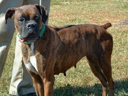
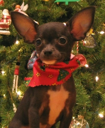
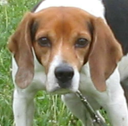
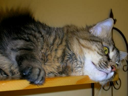
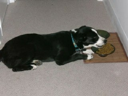

In [ ]:
tfds.as_dataframe(datos['train'].take(5), metadatos)

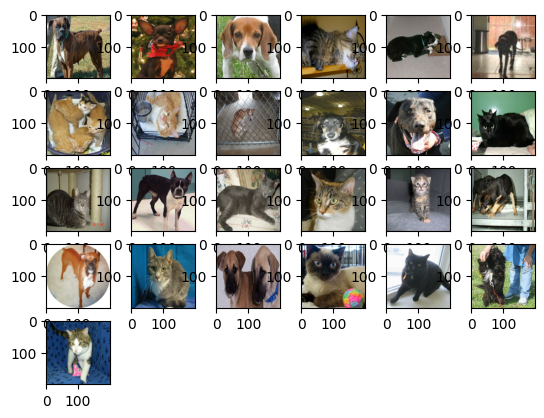

In [ ]:
import matplotlib.pyplot as plt
import cv2

Tamano_img = 200
for i, (imagen, etiqueta) in enumerate(datos['train'].take(25)):
  imagen = cv2.resize(imagen.numpy(),(Tamano_img, Tamano_img))
  plt.subplot(5,6,i+1)
  plt.imshow(imagen)

In [ ]:
datos_entrenamiento =[]

In [ ]:
for i, (imagen, etiqueta) in enumerate(datos['train']):
  imagen = cv2.resize(imagen.numpy(), (Tamano_img, Tamano_img))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  imagen.reshape((Tamano_img, Tamano_img,1))